In [3]:
'''Numerical Study'''

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import numpy as np

import pandas as pd


In [7]:
'''Load data'''

Order_df=pd.read_csv('./Data/NYC_Trips/Dispatched_Order_df.csv')

Order_df=Order_df.drop(columns=['Unnamed: 0'])

Driver_df=pd.read_csv('./Data/NYC_Trips/Dispatched_Driver_df.csv')

Driver_df=Driver_df.drop(columns=['Unnamed: 0'])

Quatitive_results=np.load('./Data/NYC_Trips/Quatitive_results.npy',allow_pickle=True)



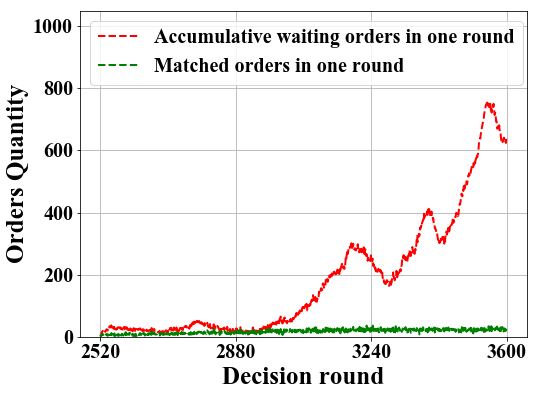

In [14]:
'''Figure'''

figsize = 8,6

font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 25}

font_legend = {'family' : 'Times New Roman','weight' : 'normal','size': 20}

figure, ax1 = plt.subplots(figsize=figsize)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

l1=ax1.plot(Quatitive_results[:,0], Quatitive_results[:,1],'r--',linewidth=2,label='Accumulative waiting orders in one round')

l1=ax1.plot(Quatitive_results[:,0], Quatitive_results[:,3],'g--',linewidth=2,label='Matched orders in one round')


ax1.set_ylabel('Orders Quantity',font_label)

ax1.set_xlabel('Decision round',font_label)

ax1.legend(loc = 'upper left',prop=font_legend)

xmajorLocator   = MultipleLocator(360)

ax1.xaxis.set_major_locator(xmajorLocator) 

ax1.set_ylim([0,1050])

plt.grid()

plt.show()

In [23]:
'''Served orders'''

Order_df.loc[(Order_df['Driver_id']!='Cancelled')&(Order_df['Driver_id']!='Waiting')].shape[0]

Order_df.loc[(Order_df['Driver_id']=='Cancelled')].shape[0]

Order_df.loc[(Order_df['Driver_id']=='Waiting')].shape[0]




624

In [22]:
624/22508

0.13621823351697174

In [15]:
'''Average waiting time'''

Order_Stat=Order_df.loc[(Order_df['Arrive_step']<=2600)&(Order_df['Driver_id']!='Cancelled')&(Order_df['Driver_id']!='Waiting')]

Order_Stat['Waiting_time']=Order_Stat.apply(lambda x:(x['Pickup_step']-x['Arrive_step'])*10,axis=1)

Order_Stat=Order_Stat[['Order_id','Pickup_step','Waiting_time']]

Order_Stat['Waiting_time'].mean()

/Users/yueyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


8.823529411764707

In [18]:
'''Average Occupied rate'''

Driver_Stat=Driver_df.loc[(Driver_df['Order_id']=='Idle')]

Driver_Stat=Driver_Stat.groupby(['Driver_id']).count()

Driver_Stat['Driver_id']=Driver_Stat.index

Driver_Stat=Driver_Stat[['Driver_id','Order_id']]

Driver_Stat=Driver_Stat.rename(columns={'Order_id':'Idle_duration'})

Driver_Stat=Driver_Stat.reset_index(drop=True)

Driver_Stat['Occcupied_rate']=Driver_Stat.apply(lambda x:(1080-x['Idle_duration'])/1080,axis=1)

Driver_Stat['Occcupied_rate'].mean()

0.4959925925925923